In [1]:
import numpy as np
#import matplotlib as plt
import pandas as pd
from matplotlib import pyplot as plt
#from huggingface_hub import hf_hub_download
import tensorflow as tf


In [2]:
#REPO_ID = "LEAP/subsampled_low_res"
#grid_path = '~/Documents/GitHub/ClimSim/grid_info/ClimSim_low-res_grid-info.nc'
#norm_path = '~/Documents/GitHub/ClimSim/preprocessing/normalizations/'
train_target_FILENAME   = "../training/train_target.npy"
train_input_FILENAME    = "../training/train_input.npy"
val_target_FILENAME     = "../training/val_target.npy"
val_input_FILENAME      = "../training/val_input.npy"
#file_path = hf_hub_download(repo_id=REPO_ID,filename=FILENAME,repo_type="dataset")
#dataset = np.load(file_path)

In [3]:
# load training dataset
train_input_dataset=np.load(train_input_FILENAME)
train_target_dataset=np.load(train_target_FILENAME)


In [4]:
print(train_target_dataset.shape)

(10091520, 128)


In [5]:
val_input_dataset=np.load(val_input_FILENAME)
val_target_dataset=np.load(val_target_FILENAME)
print(val_input_dataset.shape)


(1441920, 124)


In [6]:
# temp
temp_surface = val_input_dataset[:,59]
temp_mid = val_input_dataset[:,29]
temp_top = val_input_dataset[:,0]

# specific humidity
sp_humidity_surface = val_input_dataset[:,60+29]
sp_humidity_mid = val_input_dataset[:,60+29]
sp_humidity_top = val_input_dataset[:,60]

# surface pressure
surface_pressure = val_input_dataset[:,-4]

# Insolation
insolation = val_input_dataset[:,-3]

# Surface latent heat flux
surface_latent_heat = val_input_dataset[:,-2]

# Surface sensible heat flux
surface_sensible_heat = val_input_dataset[:,-1]



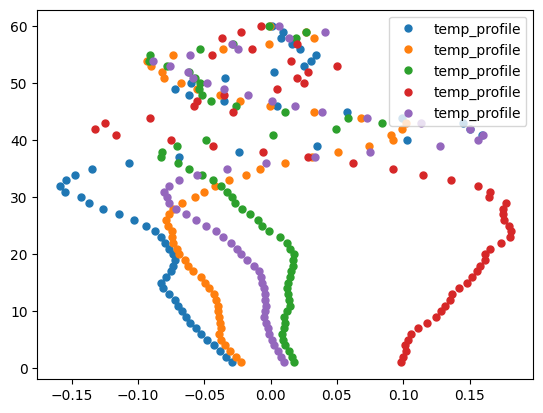

In [7]:
temp_profile = val_input_dataset[::20000,0:60]
plt.figure()
plt.plot(temp_profile[10,:],np.arange(60,0,-1),linestyle='',marker='o', markersize=5,label='temp_profile')
plt.plot(temp_profile[20,:],np.arange(60,0,-1),linestyle='',marker='o', markersize=5,label='temp_profile')
plt.plot(temp_profile[24,:],np.arange(60,0,-1),linestyle='',marker='o', markersize=5,label='temp_profile')
plt.plot(temp_profile[25,:],np.arange(60,0,-1),linestyle='',marker='o', markersize=5,label='temp_profile')
plt.plot(temp_profile[26,:],np.arange(60,0,-1),linestyle='',marker='o', markersize=5,label='temp_profile')
plt.legend()

 

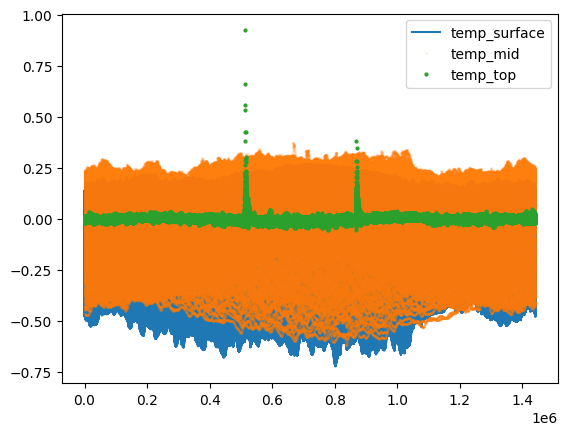

In [8]:
# plot temp
plt.figure()
plt.plot(temp_surface,label='temp_surface')
plt.plot(temp_mid,linestyle='',marker='.', markersize=2,label='temp_mid', alpha=0.1)
plt.plot(temp_top,linestyle='',marker='o', markersize=2,label='temp_top')
plt.legend()



In [9]:
# temp
temp_surface = val_input_dataset[:59]
temp_mid = val_input_dataset[:,29]
temp_top = val_input_dataset[:,0]

# specific humidity
sp_humidity_surface = val_input_dataset[:,60+29]
sp_humidity_mid = val_input_dataset[:,60+29]
sp_humidity_top = val_input_dataset[:,60]

# surface pressure
surface_pressure = val_input_dataset[:,-4]

# Insolation
insolation = val_input_dataset[:,-3]

# Surface latent heat flux
surface_latent_heat = val_input_dataset[:,-2]

# Surface sensible heat flux
surface_sensible_heat = val_input_dataset[:,-1]


In [10]:
# Output variables
snow_rate = val_target_dataset[:,122]
rain_rate = val_target_dataset[:,123]
prec_rate = snow_rate + rain_rate


In [11]:
# Generate Perturbations
# Generate a vector of random perturbations
# Assuming you want a vector of length 10
length = np.size(surface_latent_heat)
# Assuming perturbations are normally distributed with mean=0 and std=1
mean = 0
std = 1e-2

pert = np.random.normal(mean, std, length)

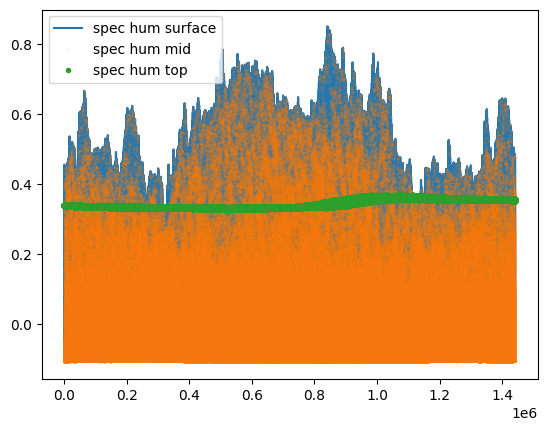

In [12]:
# plot specific humidity
plt.figure()
plt.plot(sp_humidity_surface,label='spec hum surface')
plt.plot(sp_humidity_mid,linestyle='',marker='.', markersize=2,label='spec hum mid', alpha=0.1)
plt.plot(sp_humidity_top,linestyle='',marker='o', markersize=3,label='spec hum top')
plt.legend()


60

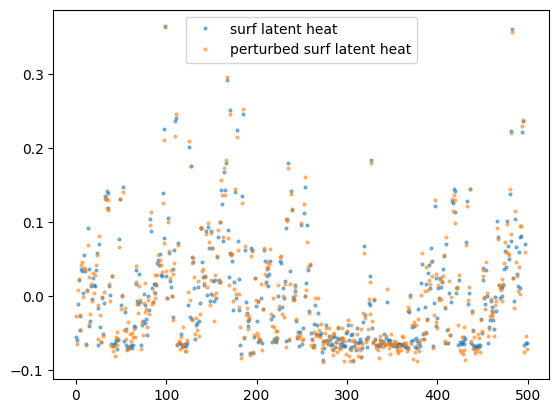

In [13]:
surface_latent_heat_perturbed = surface_latent_heat + pert;
surface_latent_heat = surface_latent_heat[0:500];
surface_latent_heat_perturbed = surface_latent_heat_perturbed[0:500];
# plot rest variables
plt.figure()
#plt.plot(surface_pressure,label='surface pressure')
#plt.plot(insolation,linestyle='',marker='.', markersize=2,label='insolation', alpha=0.1)
plt.plot(surface_latent_heat,linestyle='',marker='o', markersize=2,label='surf latent heat', alpha=0.5)
plt.plot(surface_latent_heat_perturbed,linestyle='',marker='o', markersize=2,label='perturbed surf latent heat', alpha=0.5)

#plt.plot(surface_sensible_heat,linestyle='',marker='o', markersize=2,label='surf sensible heat', alpha=0.1)
plt.legend()

np.size(surface_latent_heat[:60])

/var/folders/fh/ghn2tg_s2rd4gj75cq0n6hw80000gn/T/ipykernel_27098/2266179930.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


60

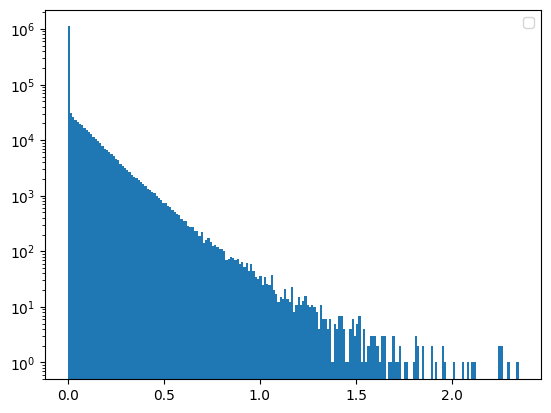

In [14]:
plt.figure()
#plt.plot(surface_pressure,label='surface pressure')
#plt.plot(insolation,linestyle='',marker='.', markersize=2,label='insolation', alpha=0.1)
plt.hist(snow_rate,bins=200)#,linestyle='',marker='o', markersize=2,label='Rain Rate', alpha=0.5)
plt.yscale('log')
# plt.plot(snow_rate,linestyle='',marker='o', markersize=2,label='Snow Rate', alpha=0.5)
# plt.plot(prec_rate,linestyle='',marker='o', markersize=2,label='Prec. Rate', alpha=0.5)

#plt.plot(surface_sensible_heat,linestyle='',marker='o', markersize=2,label='surf sensible heat', alpha=0.1)
plt.legend()

np.size(surface_latent_heat[:60])

MLR Setup

In [16]:
from climsim_utils.data_utils import *

grid_path = '~/Documents/GitHub/ClimSim/grid_info/ClimSim_low-res_grid-info.nc'
norm_path = '~/Documents/GitHub/ClimSim/preprocessing/normalizations/'

grid_info = xr.open_dataset(grid_path)
input_mean = xr.open_dataset(norm_path + 'inputs/input_mean.nc')
input_max = xr.open_dataset(norm_path + 'inputs/input_max.nc')
input_min = xr.open_dataset(norm_path + 'inputs/input_min.nc')
output_scale = xr.open_dataset(norm_path + 'outputs/output_scale.nc')

data = data_utils(grid_info = grid_info, 
                  input_mean = input_mean, 
                  input_max = input_max, 
                  input_min = input_min, 
                  output_scale = output_scale)

# set variables to V1 subset
data.set_to_v1_vars()


# Change this path to your own
data_path = '../training/'

train_input_path = data_path + 'train_input.npy'
train_target_path = data_path + 'train_target.npy'
val_input_path = data_path + 'val_input.npy'
val_target_path = data_path + 'val_target.npy'

print(train_input_path)

data.input_train = data.load_npy_file(train_input_path)
data.target_train = data.load_npy_file(train_target_path)
data.input_val = data.load_npy_file(val_input_path)
data.target_val = data.load_npy_file(val_target_path)


const_model = data.target_train.mean(axis = 0)

X = data.input_train
bias_vector = np.ones((X.shape[0], 1))
X = np.concatenate((X, bias_vector), axis=1)


## Initialize MLR weights

In [17]:
mlr_weights = np.linalg.inv(X.transpose()@X)@X.transpose()@data.target_train


../training/train_input.npy


In [93]:
data.set_pressure_grid(data_split = 'val')

# Constant Prediction
const_pred_val = np.repeat(const_model[np.newaxis, :], data.target_val.shape[0], axis = 0)
print(const_pred_val.shape)

# Multiple Linear Regression
X_val = data.input_val
bias_vector_val = np.ones((X_val.shape[0], 1))
X_val = np.concatenate((X_val, bias_vector_val), axis=1)
mlr_pred_val = X_val@mlr_weights
print(mlr_pred_val.shape)


base_pred = X_val@mlr_weights




data.model_names = ['const', 'mlr'] # add names of your models here
preds = [const_pred_val, mlr_pred_val] # add your custom predictions here
data.preds_val = dict(zip(data.model_names, preds))

(1441920, 128)
(1441920, 128)


## Perturbation Generation and Error Calculation

In [124]:

# Assuming X_val is already defined
# Define the range of standard deviations
std_devs = np.logspace(-13, 1, 20)
# std_devs = np.linspace(1e-5, 1e-2, 20)


# Variable ID to name mapping
var_id_to_name = {
    -1: 'Surface Sensible Heat Flux',
    -2: 'Surface Latent Heat Flux',
    -3: 'Insolation',
    -4: 'Surface Pressure'
}
var_id = -4 # -1 - surface sensible heat flux, -2 - surface latent heat flux, -3 - insolation, -4 - surface pressure

# Lists to store the standard deviations and errors
mae_list = []
mse_list = []
rmse_list = []

# Multiple Linear Regression
X_val = data.input_val
bias_vector_val = np.ones((X_val.shape[0], 1))
X_val_bias = np.concatenate((X_val, bias_vector_val), axis=1)
mlr_pred_val = X_val_bias@mlr_weights


# Loop over the range of standard deviations
for std in std_devs:
    # Generate the perturbation
    pert = np.random.normal(0, std, X_val.shape[0])

    # Create an independent copy of X_val and apply the perturbation to the surface latent heat flux
    X_pert = X_val.copy()
    X_pert[:, var_id] = X_pert[:, var_id] + pert
    X_pert = np.concatenate((X_pert, bias_vector_val), axis=1) # Add bias vector


    #Apply the MLR model to the perturbed data
    pert_pred = X_pert@mlr_weights

    # Calculate the differences
    differences_snow = pert_pred[:,122] - mlr_pred_val[:,122]
    differences_rain = pert_pred[:,123] - mlr_pred_val[:,123]
    differences = differences_snow + differences_rain

    # Mean Absolute Error (MAE)
    mae = np.mean(np.abs(differences))
    mae_list.append(mae)

    # Mean Squared Error (MSE)
    mse = np.mean(np.square(differences))
    mse_list.append(mse)

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

## Perturbation Calculation and Error Calculation for Percentile Splitting

In [138]:
import numpy as np
import pandas as pd

# Assuming X_val, mlr_weights, and mlr_pred_val are already defined
# Define the range of standard deviations using a log scale
std_devs = np.logspace(-13, 1, 20)

# Lists to store the standard deviations and errors
percentile_errors = []


# Multiple Linear Regression
X_val = data.input_val
bias_vector_val = np.ones((X_val.shape[0], 1))
X_val_bias = np.concatenate((X_val, bias_vector_val), axis=1)
mlr_pred_val = X_val_bias@mlr_weights


# Calculate the total precipitation (snow + rain) for each instance
total_precipitation = mlr_pred_val[:, 122] + mlr_pred_val[:, 123]


# Variable ID to name mapping
var_id_to_name = {
    -1: 'Surface Sensible Heat Flux',
    -2: 'Surface Latent Heat Flux',
    -3: 'Insolation',
    -4: 'Surface Pressure'
}
var_id = -4 # -1 - surface sensible heat flux, -2 - surface latent heat flux, -3 - insolation, -4 - surface pressure


# print(mlr_pred_val.shape)
# Verify the shape of total_precipitation
# print(f"total_precipitation shape: {total_precipitation.shape}")

# Define the number of percentiles
percentiles = np.percentile(total_precipitation, np.arange(0, 101, 10))
# print(min(mlr_pred_val[:, 123]))
bias_vector_val = np.ones((X_val.shape[0], 1))

# Loop over the range of standard deviations
for std in std_devs:
    # Generate the perturbation
    pert = np.random.normal(0, std, X_val.shape[0])

    # Create an independent copy of X_val and apply the perturbation to the surface latent heat flux
    X_pert = X_val.copy()
    X_pert[:, var_id] = X_pert[:, var_id] + pert
    X_pert = np.concatenate((X_pert, bias_vector_val), axis=1) # Add bias vector

    # Apply the MLR model to the perturbed data
    pert_pred = X_pert @ mlr_weights

    # Calculate the differences
    differences_snow = pert_pred[:, 122] - mlr_pred_val[:, 122]
    differences_rain = pert_pred[:, 123] - mlr_pred_val[:, 123]
    differences = differences_snow + differences_rain

    # Verify the shape of differences
    # print(f"differences shape: {differences.shape}")

    # Calculate the error for each percentile
    errors = []
    for i in range(len(percentiles) - 1):
        # print(i)
        mask = (total_precipitation >= percentiles[i]) & (total_precipitation < percentiles[i + 1])
        # print(f"mask shape: {mask.shape}")  # Check mask shape
        bin_differences = differences[mask]
        # print(f"bin_differences shape: {bin_differences.shape}")  # Check bin_differences shape
        mae = np.mean(np.abs(bin_differences))
        print(f"Percentile: {percentiles[i]} - {percentiles[i + 1]} | MAE: {mae}")
        errors.append(mae)

    percentile_errors.append(errors)

# Convert results to a numpy array for easier plotting
percentile_errors = np.array(percentile_errors)

Percentile: -0.22851989400044476 - -0.018528310390923827 | MAE: 1.2993101933914167e-21
Percentile: -0.018528310390923827 - 0.00826098138313042 | MAE: 0.0
Percentile: 0.00826098138313042 - 0.028850418279542475 | MAE: 5.558160271729949e-21
Percentile: 0.028850418279542475 - 0.04743796916992577 | MAE: 3.440765882499493e-21
Percentile: 0.04743796916992577 - 0.06544245360512545 | MAE: 2.7670494859261653e-21
Percentile: 0.06544245360512545 - 0.0842001460154311 | MAE: 4.9566277747894786e-21
Percentile: 0.0842001460154311 - 0.10562153846747196 | MAE: 2.1414556891080758e-21
Percentile: 0.10562153846747196 - 0.13351006795680287 | MAE: 4.836321275401385e-21
Percentile: 0.13351006795680287 - 0.17669489401006697 | MAE: 5.678466771118044e-21
Percentile: 0.17669489401006697 - 2.5492811258162904 | MAE: 2.6948842758480403e-21
Percentile: -0.22851989400044476 - -0.018528310390923827 | MAE: 8.871401264878062e-20
Percentile: -0.018528310390923827 - 0.00826098138313042 | MAE: 1.3835247429630826e-20
Percent

In [ ]:
percentile_errors

## Error Plotting 

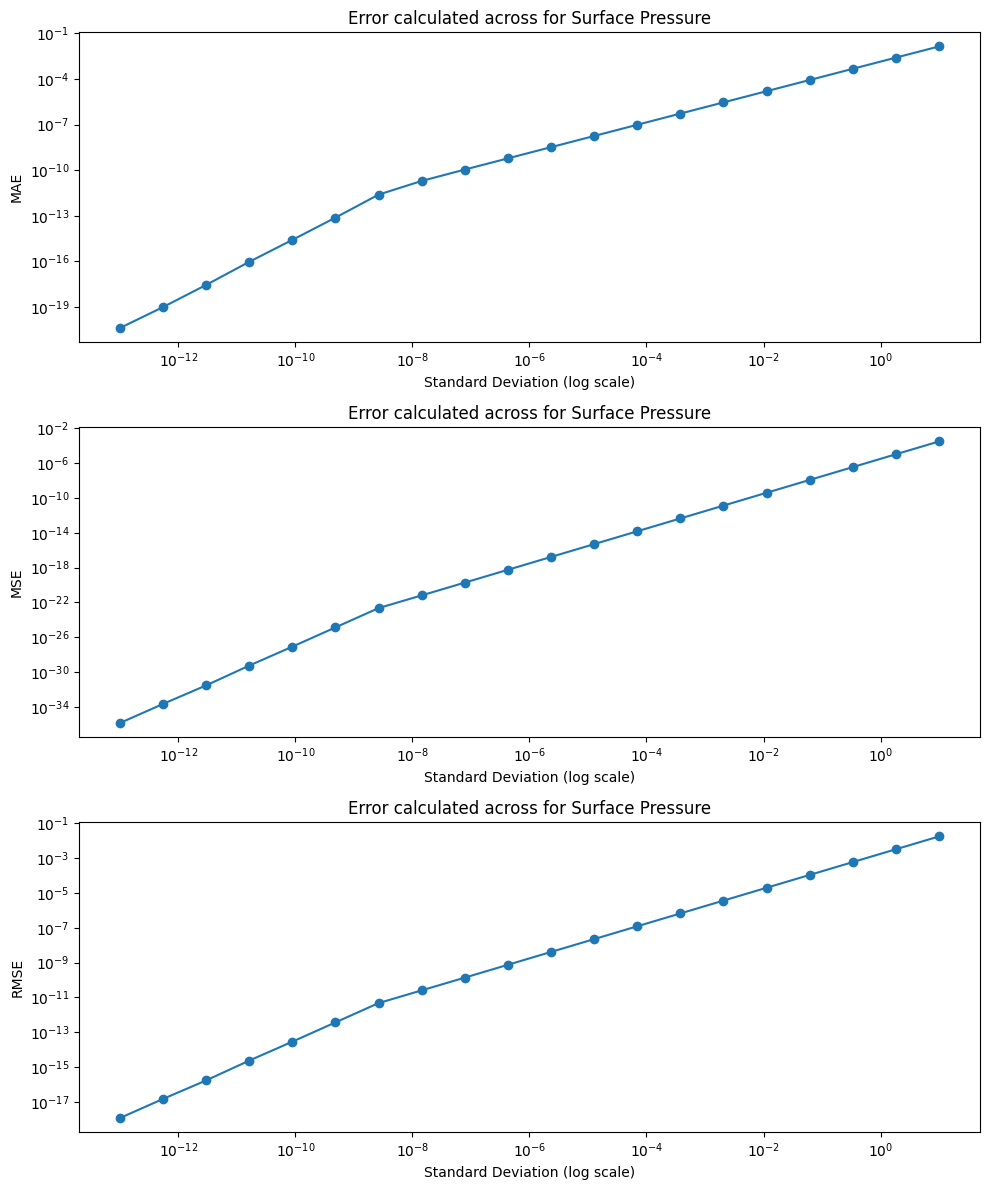

In [125]:
# Create the figure and adjust the size
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Get the variable name from the var_id
variable_name = var_id_to_name.get(var_id, 'Unknown Variable')

# Plot the errors against the standard deviations on a log scale
axs[0].plot(std_devs, mae_list, marker='o')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('Standard Deviation (log scale)')
axs[0].set_ylabel('MAE')
axs[0].set_title(f'Error calculated across for {variable_name}')

axs[1].plot(std_devs, mse_list, marker='o')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('Standard Deviation (log scale)')
axs[1].set_ylabel('MSE')
axs[1].set_title(f'Error calculated across for {variable_name}')

axs[2].plot(std_devs, rmse_list, marker='o')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_xlabel('Standard Deviation (log scale)')
axs[2].set_ylabel('RMSE')
axs[2].set_title(f'Error calculated across for {variable_name}')


# Get the variable name from the var_id
variable_title = var_id_to_name.get(var_id, 'Unknown_Variable').replace(" ", "_")

# Adjust layout and set the figure size
fig.set_size_inches(10, 12)
fig.tight_layout()
plt.show()
fig.savefig(f'MAE_vs_StdDev_and_Precipitation_for_{variable_title}.png')

## Error Plotting for Percentile Splitting

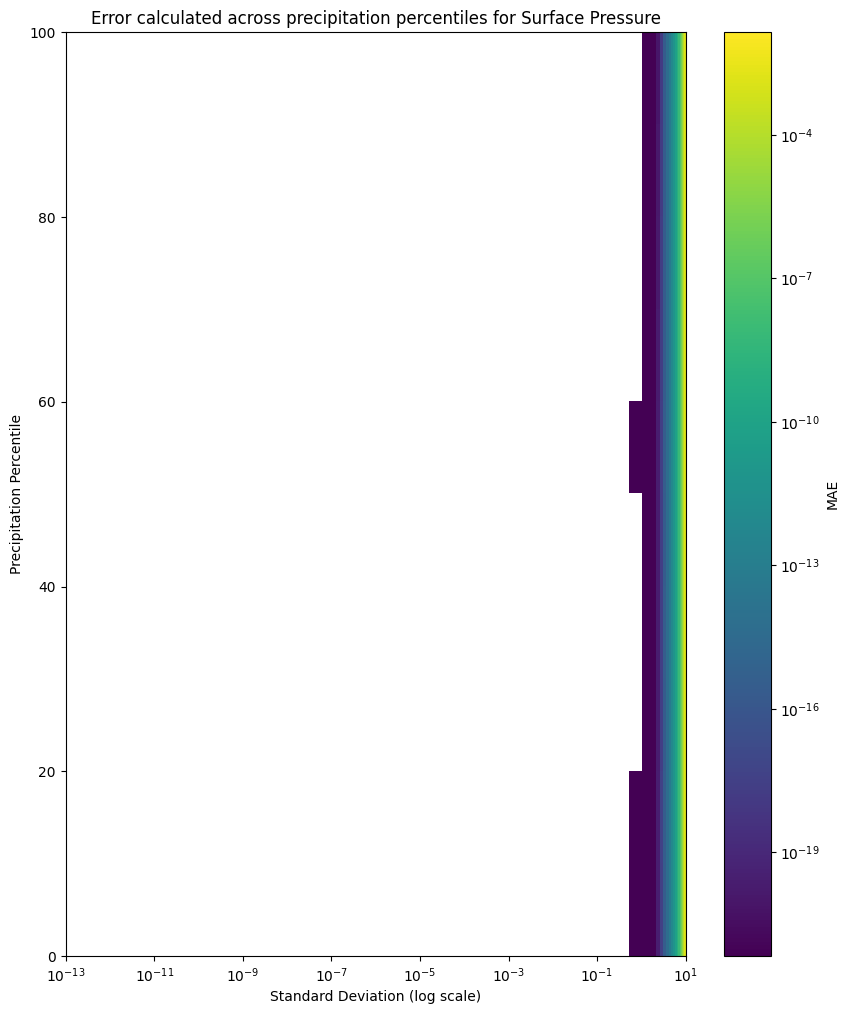

In [137]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Get the variable name from the var_id
variable_name = var_id_to_name.get(var_id, 'Unknown Variable')

# Plot the 2D plot
fig, ax = plt.subplots(figsize=(10, 12))
cax = ax.imshow(percentile_errors.T, aspect='auto', cmap='viridis', norm=LogNorm(), extent=[std_devs.min(), std_devs.max(), 0, 100])
ax.set_xscale('log')
cbar = fig.colorbar(cax, label='MAE')
ax.set_xlabel('Standard Deviation (log scale)')
ax.set_ylabel('Precipitation Percentile')
ax.set_title(f'Error calculated across precipitation percentiles for {variable_name}')
plt.show()


# Get the variable name from the var_id
variable_title = var_id_to_name.get(var_id, 'Unknown_Variable').replace(" ", "_")


fig.savefig(f'MAE_vs_StdDev_and_Precipitation_Percentile_for_{variable_title}.png')